1.Написать адаптивный оптимизатор

In [25]:
#Adagrad
#accumulated += gradient ** 2
#adapt_lr = lr/sqrt(accumulated)
#w = w - adapt_lr * gradient

In [26]:
class Adagrad:
    def __init__(self, model, lr=0.001):
        self.lr = lr
        self.model = model

        self.vel_w = np.zeros_like(model.w)
        self.vel_b = np.zeros_like(model.b)
    
    def step(self):
        self.accumulated_w += self.model.d_w ** 2
        self.accumulated_b += self.model.d_b ** 2
        self.adapt_lr_w = self.lr / (self.accumulated_w) ** 0.5
        self.adapt_lr_b = self.lr / (self.accumulated_b) ** 0.5
        w = w - self.adapt_lr_w * self.model.d_w 
        b = b - self.adapt_lr_b * self.model.d_b
        
    def zero_grad(self):
        self.model.d_w = np.zeros_like(self.model.d_w)
        self.model.d_b = np.zeros_like(self.model.d_b)
        
        return w, b

2.Найти корни кадратного уравнения методом градиентного спуска

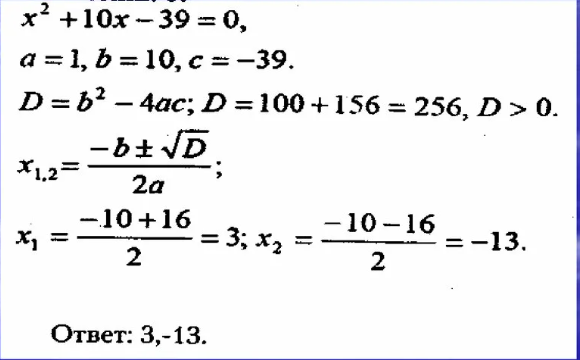

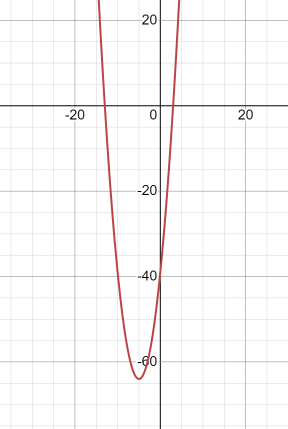

In [27]:
# возведем уравнение в квадрат, чтобы отобразить его на положительной области
# посчитаем производную от преобразованной функции
# надо начать движение от начальной точки в направлении антиградиента с заданным шагом
# x = x - lr * grad(x)

In [28]:
#возведем в квадрат и найдем производную
# ((x^2 + 10x-39)^2))'
# 2*(x^2 + 10x-39)*(x^2 + 10x-39)' = 2*(x^2 + 10x-39)*(2x+10)
def gradient(x):
    gradient = 2*(x**2 + 10*x - 39) * (2*x + 10)
    return gradient

In [29]:
#нахождение корня уравнения при начальном взятии x из отрицательной области 
def grad_minus(x, lr, eps):
    count_step = 0
    while True:
        x_0 = x
        x = x - lr * gradient(x)
        loss = gradient(x) - gradient(x_0)
        count_step +=1
        if abs(loss) <= eps:
            itog = x
            x += 0.001
            break          
    return round(itog, 2), count_step

In [30]:
print('Первый корень уравнения, количество шагов: ', grad_minus(-20, 0.001, 0.0001))

Первый корень уравнения, количество шагов:  (-13.0, 26)


In [31]:
#нахождение корня уравнения при начальном взятии x из положительной области 
def grad_plus(x, lr, eps):
    count_step = 0
    while True:
        x_0 = x
        x = x - lr * gradient(x)
        loss = gradient(x) - gradient(x_0)
        count_step +=1
        if abs(loss) <= eps:
            itog = x
            x += 0.001
            break          
    return round(itog, 2), count_step

In [32]:
print('Второй корень уравнения, количесво шагов: ', grad_plus(10, 0.0001, 0.0001))

Второй корень уравнения, количесво шагов:  (3.0, 258)


3.Написать на PyTorch глубокую сеть. Проверить работу forward pass.

In [33]:
import torch
from torch import nn
import torch.optim as optim

In [34]:
x = torch.randn(500)
y=x**2 + torch.randn(500)*0.1

In [35]:
x.size(), y.size()

(torch.Size([500]), torch.Size([500]))

In [36]:
class MyModel(nn.Module):
    def __init__(self,):
        super().__init__()

        self.layer1 = nn.Linear(1, 100)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(100, 50)
        self.activation2 = nn.ReLU()
        self.layer3 = nn.Linear(50, 10)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation1(x)
        x = self.layer2(x)
        x = self.activation2(x)
        x = self.layer3(x)

        return x

In [37]:
model = MyModel()
model.train()
optimizer = optim.Adam(model.parameters(), lr=0.005)
loss_fn = nn.MSELoss()

In [38]:
epoc = 15
for e in range(0, epoc):
    for i, (val, t) in enumerate(zip(x, y)):
        optimizer.zero_grad()
        predictions = model(val.unsqueeze(0))
        loss = loss_fn(predictions,t)
        loss.backward()
        optimizer.step()
    print(f'epoc = {e} -- loss = {loss.item()}')

epoc = 0 -- loss = 0.001971406862139702
epoc = 1 -- loss = 0.002744485391303897
epoc = 2 -- loss = 0.004248074255883694
epoc = 3 -- loss = 0.004018832929432392
epoc = 4 -- loss = 0.0020275916904211044
epoc = 5 -- loss = 3.5542067053029314e-05
epoc = 6 -- loss = 0.0013120797229930758
epoc = 7 -- loss = 0.0012483519967645407
epoc = 8 -- loss = 0.002746031153947115
epoc = 9 -- loss = 0.0033471155911684036
epoc = 10 -- loss = 0.0009789132745936513
epoc = 11 -- loss = 0.0043446640484035015
epoc = 12 -- loss = 0.002666967222467065
epoc = 13 -- loss = 0.005362360272556543
epoc = 14 -- loss = 0.00605816813185811
